In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import os
import copy

In [2]:
import sys
sys.path.append('/home/jkipen/ProtInfGPU/code/numpy')

from WrapperEMCrossValv3 import WrapperEMCrossValv3

In [3]:
path_results="/home/jkipen/ProtInfGPU/results/5_Prot/"
path_dataset="/home/jkipen/fast_data/ProtInfGPU/data/5_Prot/"

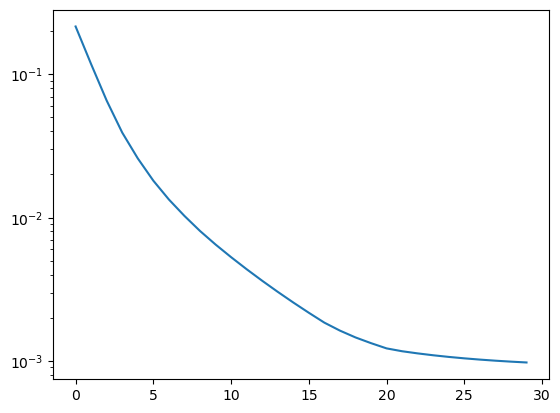

Computing time was 5.779404163360596


In [13]:
##Test to see it works
WEMV=WrapperEMCrossValv3(path_dataset,n_crossval=2)
WEMV.compute_cv()
plt.plot(np.mean(WEMV.errs,axis=0))
plt.yscale('log')
plt.show()
print("Computing time was " + str(WEMV.compute_time))

# Simulations to run on 5 Prot
Here we generate all the data that we are going to use for plots for the paper with the simulation of 5 Prot. We save in results everything we need.

## Oracle Simulations
First we start with oracle simulations:
### Oracle different Perrs

In [15]:
oracle_perr=[0,0.001,0.002,0.005,0.01, 0.02, 0.05, 0.1, 0.2];
all_errs=[];
WEMV=WrapperEMCrossValv3(path_dataset,oracle=True,oracle_perr=0.0)
WEMV.gen_crossval_dists();
for perr in oracle_perr:
    WEMV.oracle_perr=perr;
    WEMV.compute_cv()
    all_errs.append(WEMV.errs)

In [16]:
oracle_perr_np=np.asarray(oracle_perr)
all_errs_np=np.asarray(all_errs)
np.savez(path_results+'OraclePerrSweep.npz', Perr=oracle_perr_np, Errs=all_errs_np)

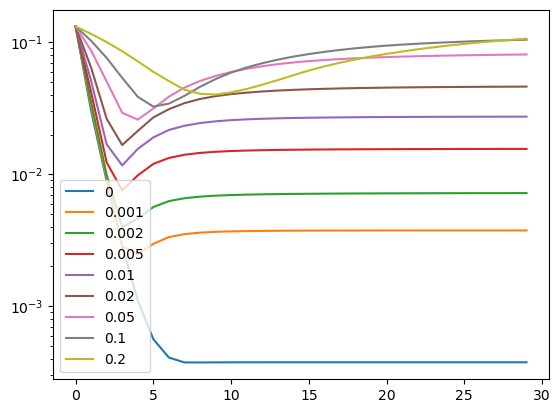

In [17]:
plt.figure()
for i in range(len(oracle_perr)):
    plt.plot(np.mean(all_errs[i],axis=0),label=str(oracle_perr[i]))
plt.yscale('log')
plt.legend()
plt.show()

In [38]:
np.std(all_errs[i],axis=0)

array([0.04135301, 0.02037771, 0.00792981, 0.0028982 , 0.001154  ,
       0.00098728, 0.00104872, 0.00106843, 0.00108008, 0.00108443,
       0.00108603, 0.00108662, 0.00108683, 0.00108691, 0.00108694,
       0.00108695, 0.00108695, 0.00108695, 0.00108695, 0.00108695,
       0.00108695, 0.00108695, 0.00108695, 0.00108695, 0.00108695,
       0.00108695, 0.00108695, 0.00108695, 0.00108695, 0.00108695])

### Oracle subsets

In [37]:
n_samples_arr=[2e3,5e3,10e3,20e3,50e3,100e3,200e3,500e3,1e6,2e6,5e6];
#n_samples_arr=[2e3,20e3,200e3,1e6];
all_errs=[];
for n_samples in n_samples_arr:
    WEMV=WrapperEMCrossValv3(path_dataset,oracle=True,oracle_perr=0.0,n_samples=n_samples)
    WEMV.compute_cv()
    all_errs.append(WEMV.errs)

In [39]:
n_samples_arr_np=np.asarray(n_samples_arr)
all_errs_np=np.asarray(all_errs)
np.savez(path_results+'OracleSubsets.npz', Nsamples=n_samples_arr_np, Errs=all_errs_np)

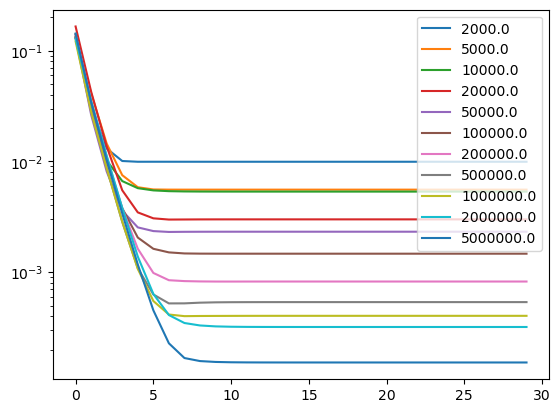

In [40]:
plt.figure()
for i in range(len(n_samples_arr)):
    plt.plot(np.mean(all_errs[i],axis=0),label=str(n_samples_arr[i]))
plt.yscale('log')
plt.legend()
plt.show()

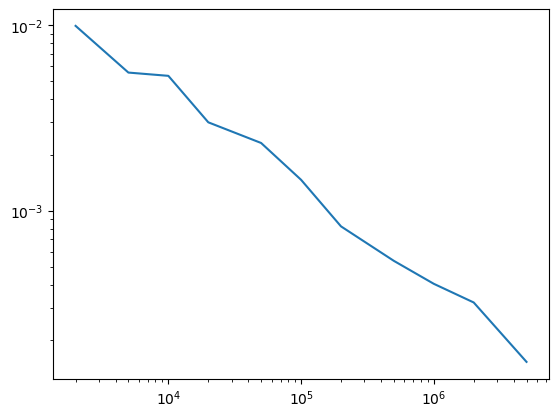

In [42]:
plt.figure()
final_err=[np.mean(Errs,axis=0)[-1] for Errs in all_errs_np] 
plt.plot(n_samples_arr,final_err)
plt.yscale('log')
plt.xscale('log')
plt.show()

## N sparsity Probeam

In [10]:
n_sparsity_arr=[2,5,10,15,20,25,30,35,40,60,100,120];
#n_sparsity_arr=[5,25,60];
all_errs=[];
WEMV=WrapperEMCrossValv3(path_dataset,oracle=False)
WEMV.gen_crossval_dists(); ##Same crossval sets for different sparsities!
for n_sparsity in n_sparsity_arr:
    WEMV.n_sparsity=n_sparsity;
    WEMV.compute_cv()
    all_errs.append(WEMV.errs)

In [11]:
n_sparsity_arr=np.asarray(n_sparsity_arr)
all_errs_np=np.asarray(all_errs)
np.savez(path_results+'Nspar.npz', Nspar=n_sparsity_arr, Errs=all_errs_np)

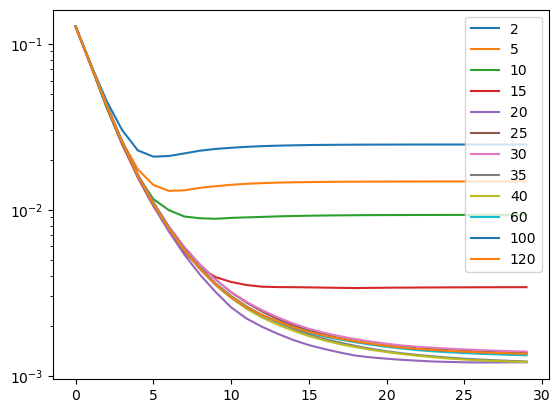

In [14]:
plt.figure()
for i in range(0,len(n_sparsity_arr)):
    plt.plot(np.mean(all_errs[i],axis=0),label=str(n_sparsity_arr[i]))
plt.yscale('log')
plt.legend()
plt.show()

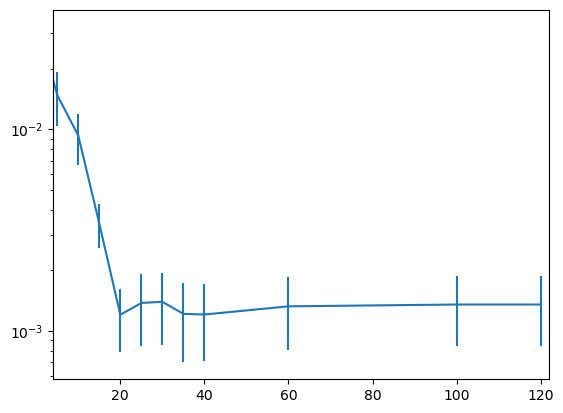

In [18]:
plt.figure()
final_err_val=[np.mean(Errs,axis=0)[-1] for Errs in all_errs_np] 
final_err_std=[np.std(Errs,axis=0)[-1] for Errs in all_errs_np] 
plt.errorbar(n_sparsity_arr,final_err_val,yerr=final_err_std)
plt.yscale('log')
#plt.xscale('log')
plt.xlim([4,122])
plt.show()

## Probeam vs oracle

In [19]:
WEMV=WrapperEMCrossValv3(path_dataset,oracle=True)
WEMV.gen_crossval_dists(); ##Same crossval sets for different sparsities!
true_PYs=copy.deepcopy(WEMV.P_Ys_true)
## Oracle run
oracle_PYs_est=WEMV.compute_cv()
oracle_errs=copy.deepcopy(WEMV.errs)
oracle_t=copy.deepcopy(WEMV.compute_time)
## Probeam run
WEMV.oracle=False;
probeam_PYs_est=WEMV.compute_cv()
probeam_errs=copy.deepcopy(WEMV.errs)
probeam_t=copy.deepcopy(WEMV.compute_time)

## Probeam Sparse
WEMV.n_sparsity=40;
probeamS_PYs_est=WEMV.compute_cv()
probeamS_errs=copy.deepcopy(WEMV.errs)
probeamS_t=copy.deepcopy(WEMV.compute_time)


In [21]:
np.savez(path_results+'Comparison.npz', true_PYs=true_PYs, oracle_PYs_est=oracle_PYs_est,oracle_errs=oracle_errs,oracle_t=oracle_t,
        probeam_PYs_est=probeam_PYs_est,probeam_errs=probeam_errs,probeam_t=probeam_t,probeamS_PYs_est=probeamS_PYs_est,
        probeamS_errs=probeamS_errs,probeamS_t=probeamS_t)

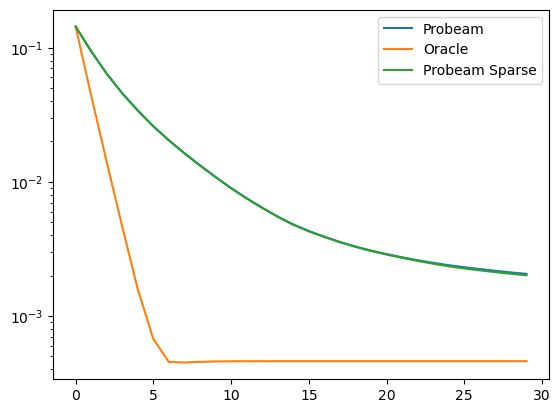

In [20]:
plt.figure()
plt.plot(np.mean(probeam_errs,axis=0),label="Probeam")
plt.plot(np.mean(oracle_errs,axis=0),label="Oracle")
plt.plot(np.mean(probeamS_errs,axis=0),label="Probeam Sparse")
plt.yscale('log')
plt.legend()
plt.show()

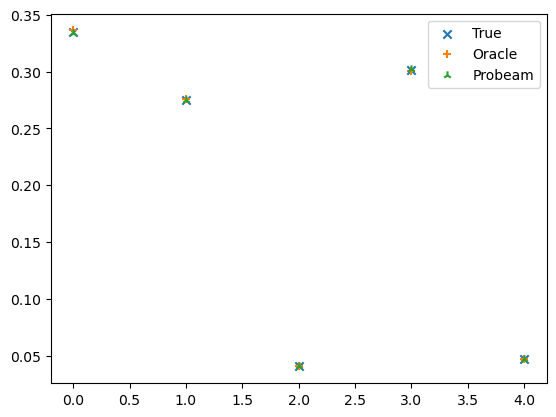

In [9]:
plt.figure()
plt.scatter(np.arange(5),true_PYs[0,:],marker='x',label="True")
plt.scatter(np.arange(5),oracle_PYs_est[0,:],marker='+',label="Oracle")
plt.scatter(np.arange(5),probeam_PYs_est[0,:],marker="2",label="Probeam")
plt.legend()
plt.show()

# Doing the plots correctly

## OraclePerrSweep

In [58]:
def human_readable(n):
    if n >= 1_000_000_000:
        return f"{n/1_000_000_000:.0f}B"
    elif n >= 1_000_000:
        return f"{n/1_000_000:.0f}M"
    elif n >= 1_000:
        return f"{n/1_000:.0f}K"
    else:
        return str(n)

In [88]:
data = np.load(path_results + 'OraclePerrSweep.npz')
Perr = data['Perr']
Errs = data['Errs']

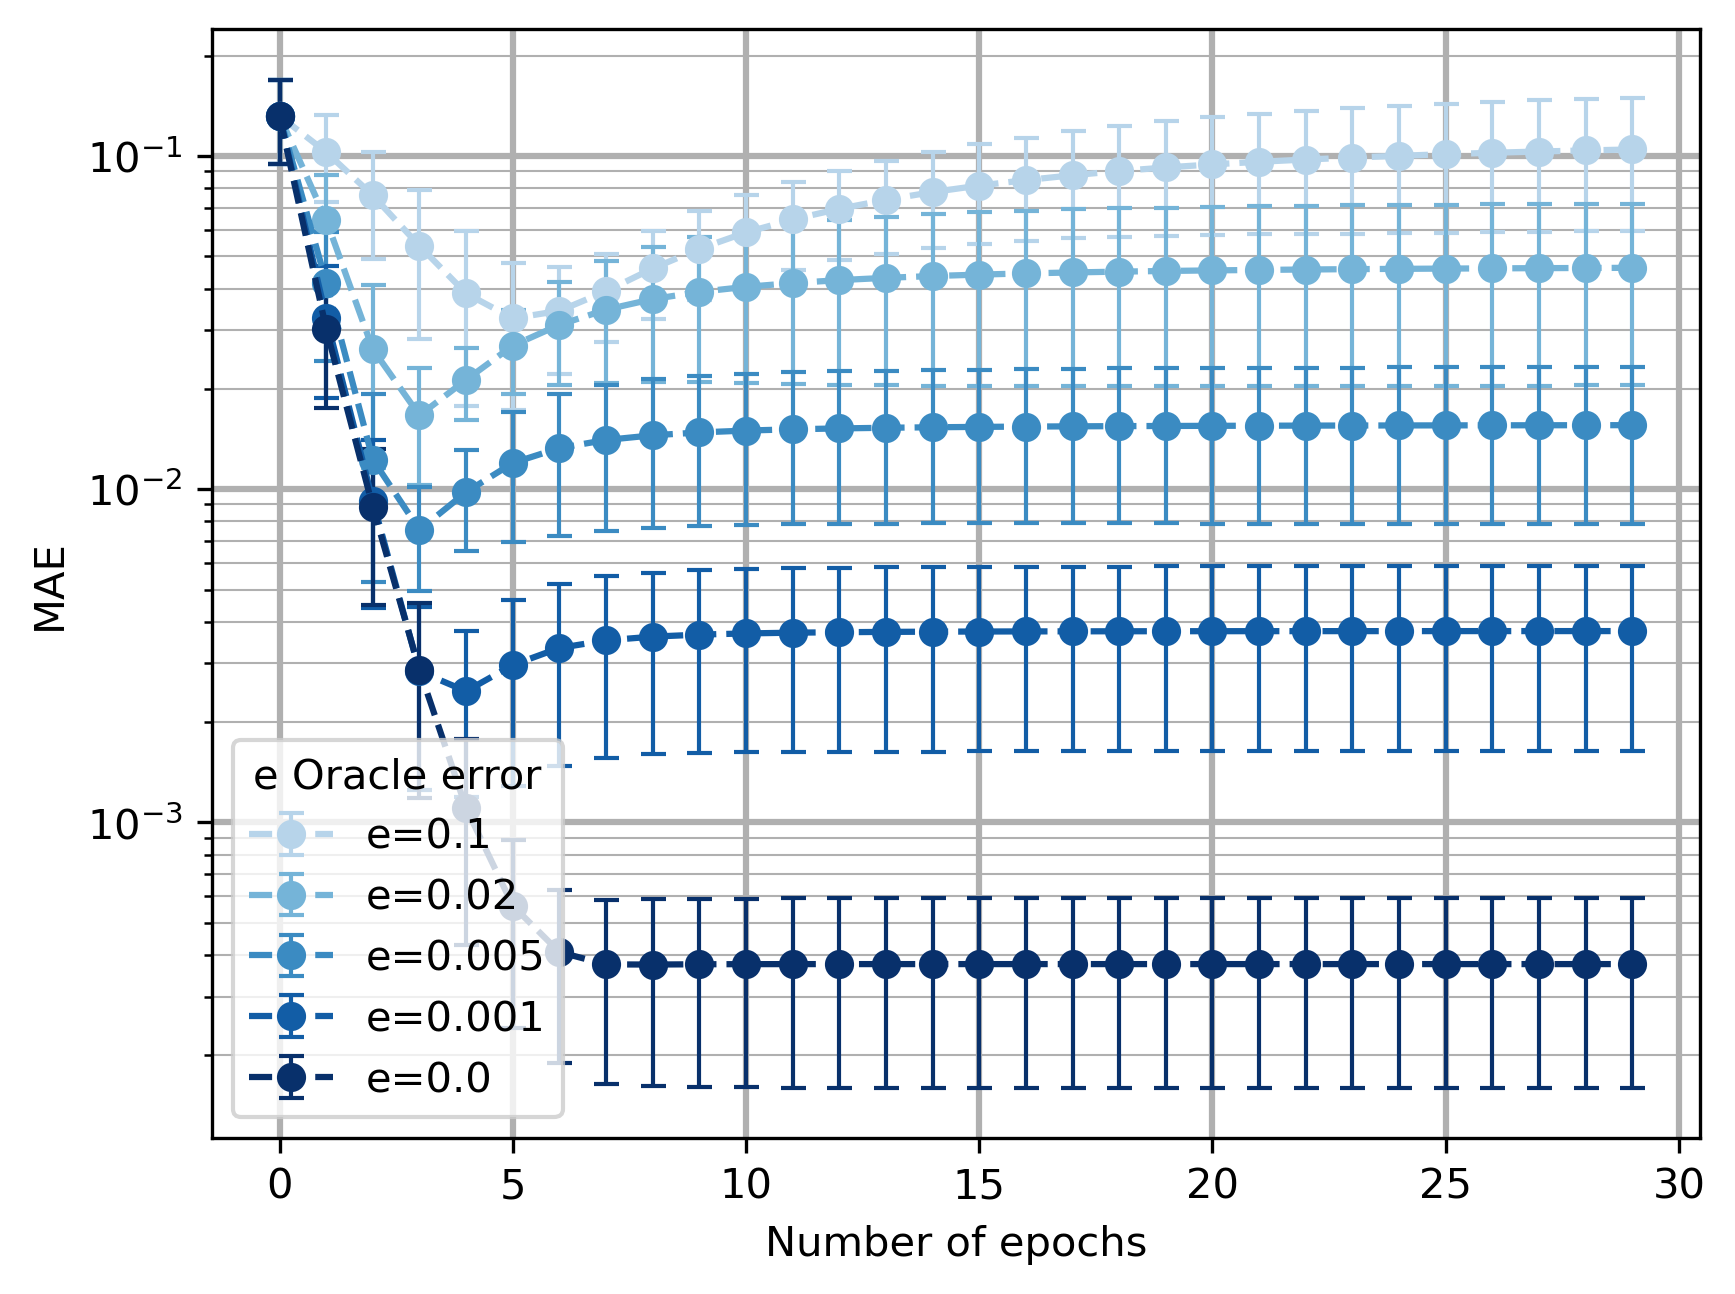

In [90]:
exclude = {2, 4, 6, 8}
Perr_f = [p for i, p in enumerate(Perr) if i not in exclude]
Errs_f = [e for i, e in enumerate(Errs) if i not in exclude]

M = len(Perr_f)
epochs = np.arange(Errs[0].shape[1])

cmap = plt.get_cmap("Blues")
colors = cmap(np.linspace(0.3, 1.0, M))  # avoid very pale by starting at 0.3

plt.figure(dpi=300)
for i in reversed(range(len(Perr_f))):
    mean_vals = Errs_f[i].mean(axis=0)
    std_vals  = Errs_f[i].std(axis=0)
    plt.errorbar(
        epochs,
        mean_vals,
        yerr=std_vals,
        label="e="+str(Perr_f[i]),
        fmt='o',
        linestyle='dashed',
        elinewidth=1,
        capthick=1,
        capsize=3,           
        color=colors[-(i+1)]
    )
plt.yscale('log')
plt.xlabel("Number of epochs")
plt.ylabel("MAE")
plt.legend(title= "e Oracle error")
plt.grid(visible=True, which='major', linewidth=1.5)
plt.grid(visible=True, which='minor', linewidth=0.5, linestyle='-')
plt.savefig(path_results + "OraclePerr.png")
plt.show()


## Subsets

In [59]:
data = np.load(path_results + 'OracleSubsets.npz')
Nsamples = data['Nsamples']
Errs = data['Errs']

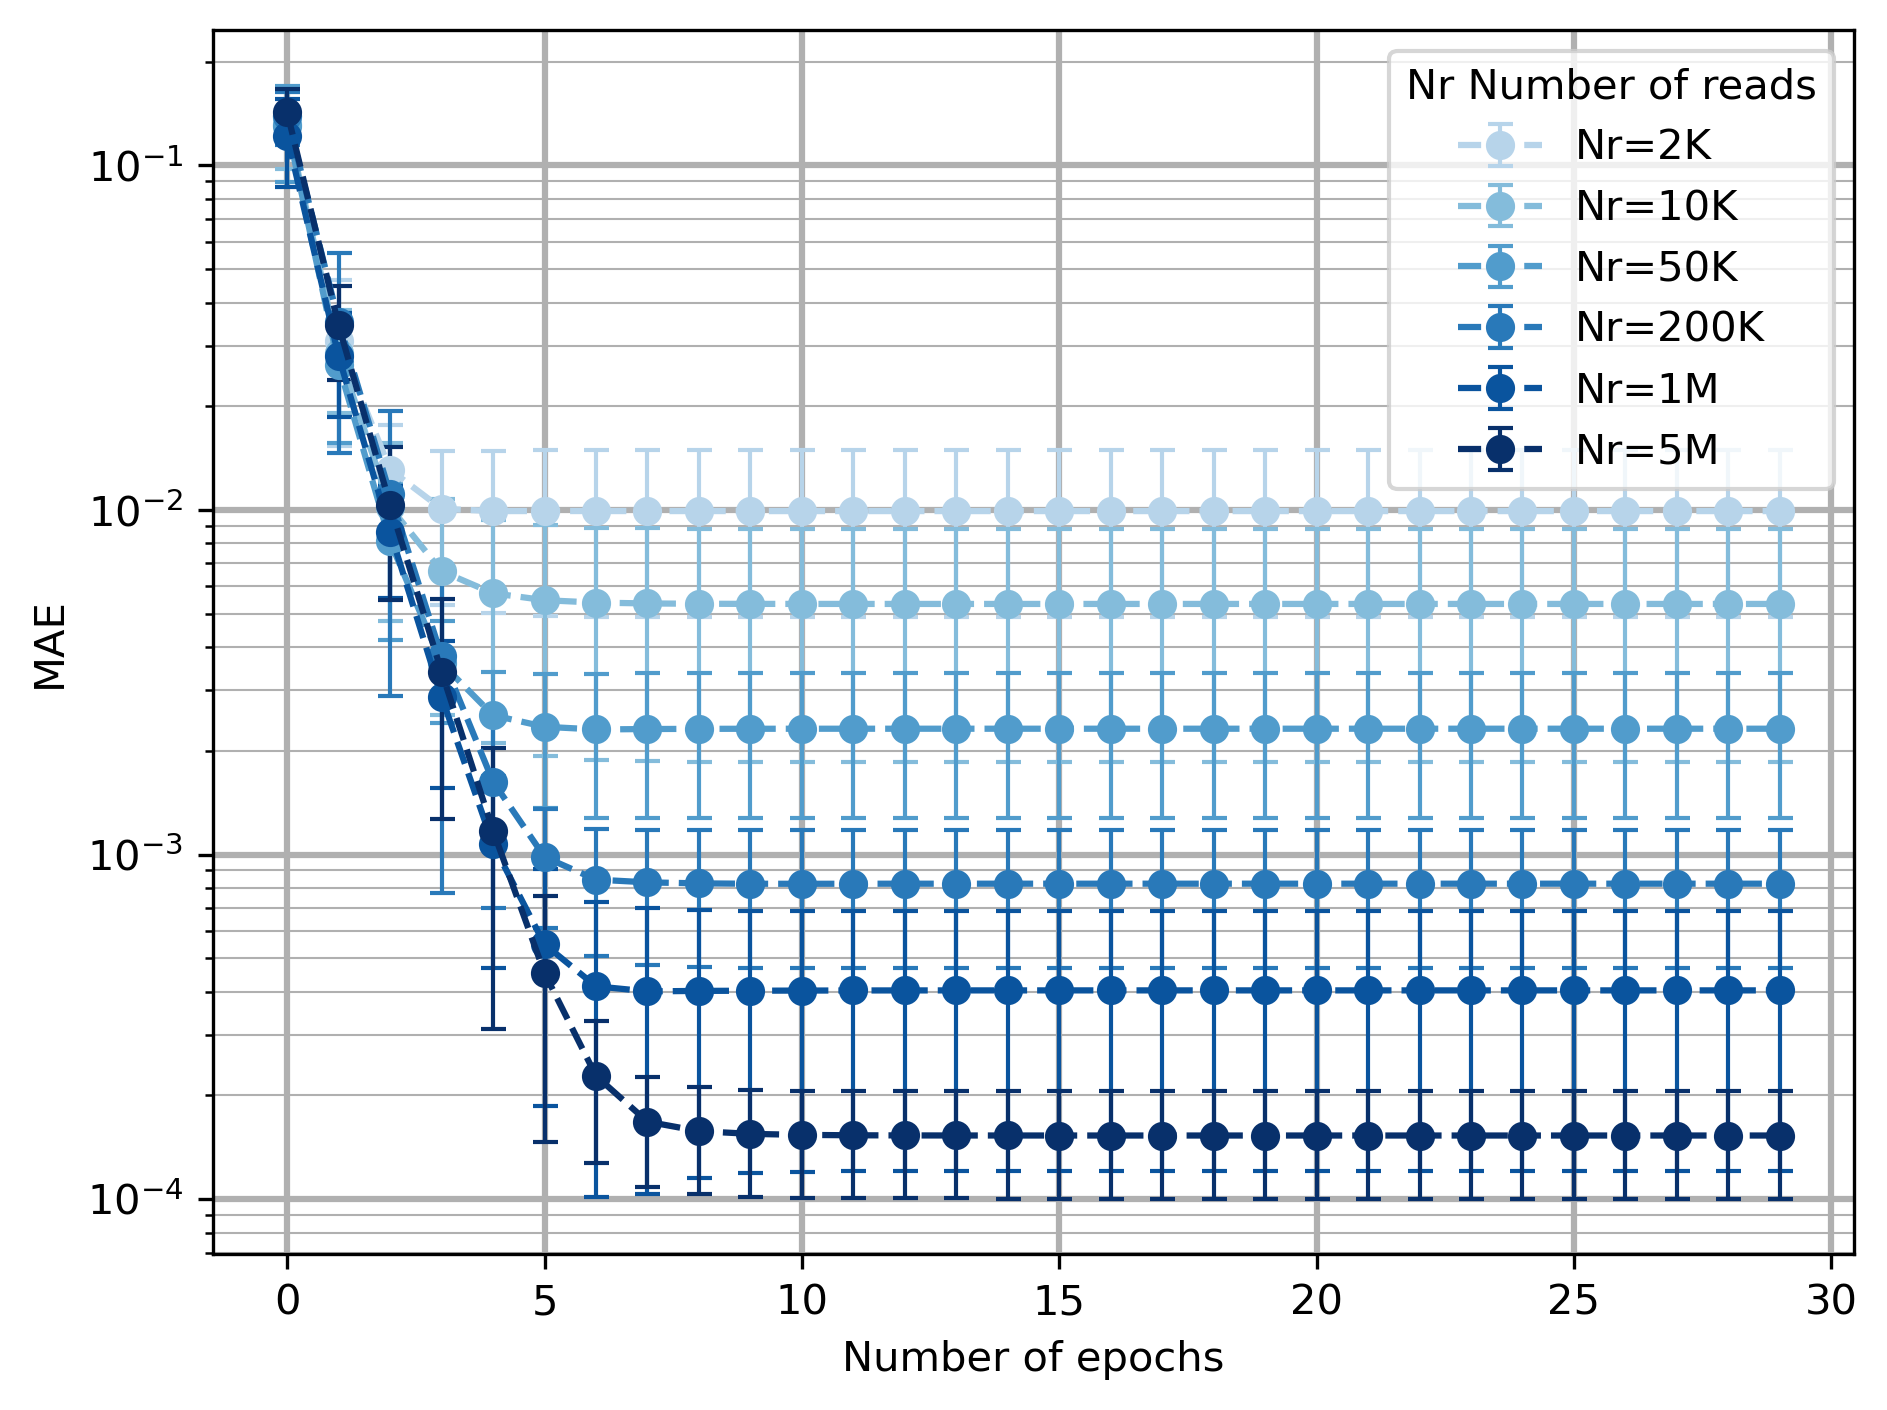

In [60]:
# Exclude indices 1 and 2
exclude = {1,3,5,7,9}
Nsamples_f = [n for i, n in enumerate(Nsamples) if i not in exclude]
Errs_f = [e for i, e in enumerate(Errs) if i not in exclude]

# Plot settings
M = len(Nsamples_f)
epochs = np.arange(Errs[0].shape[1])
cmap = plt.get_cmap("Blues")
colors = cmap(np.linspace(0.3, 1.0, M))  # avoid very pale

plt.figure(dpi=300)
for i in range(M):
    mean_vals = Errs_f[i].mean(axis=0)
    std_vals  = Errs_f[i].std(axis=0)
    plt.errorbar(
        epochs,
        mean_vals,
        yerr=std_vals,
        label="Nr="+human_readable(int(Nsamples_f[i])),
        fmt='o',
        linestyle='dashed',
        elinewidth=1,
        capthick=1,
        capsize=3,
        color=colors[i]
    )

# Axis and layout
plt.yscale('log')
plt.xlabel("Number of epochs")
plt.ylabel("MAE")
plt.legend(title="Nr Number of reads")
plt.grid(visible=True, which='major', linewidth=1.5)
plt.grid(visible=True, which='minor', linewidth=0.5, linestyle='-')
plt.tight_layout()
plt.savefig(path_results + "OracleSubsets1.png")
plt.show()


/tmp/ipykernel_12200/324120937.py:11: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(


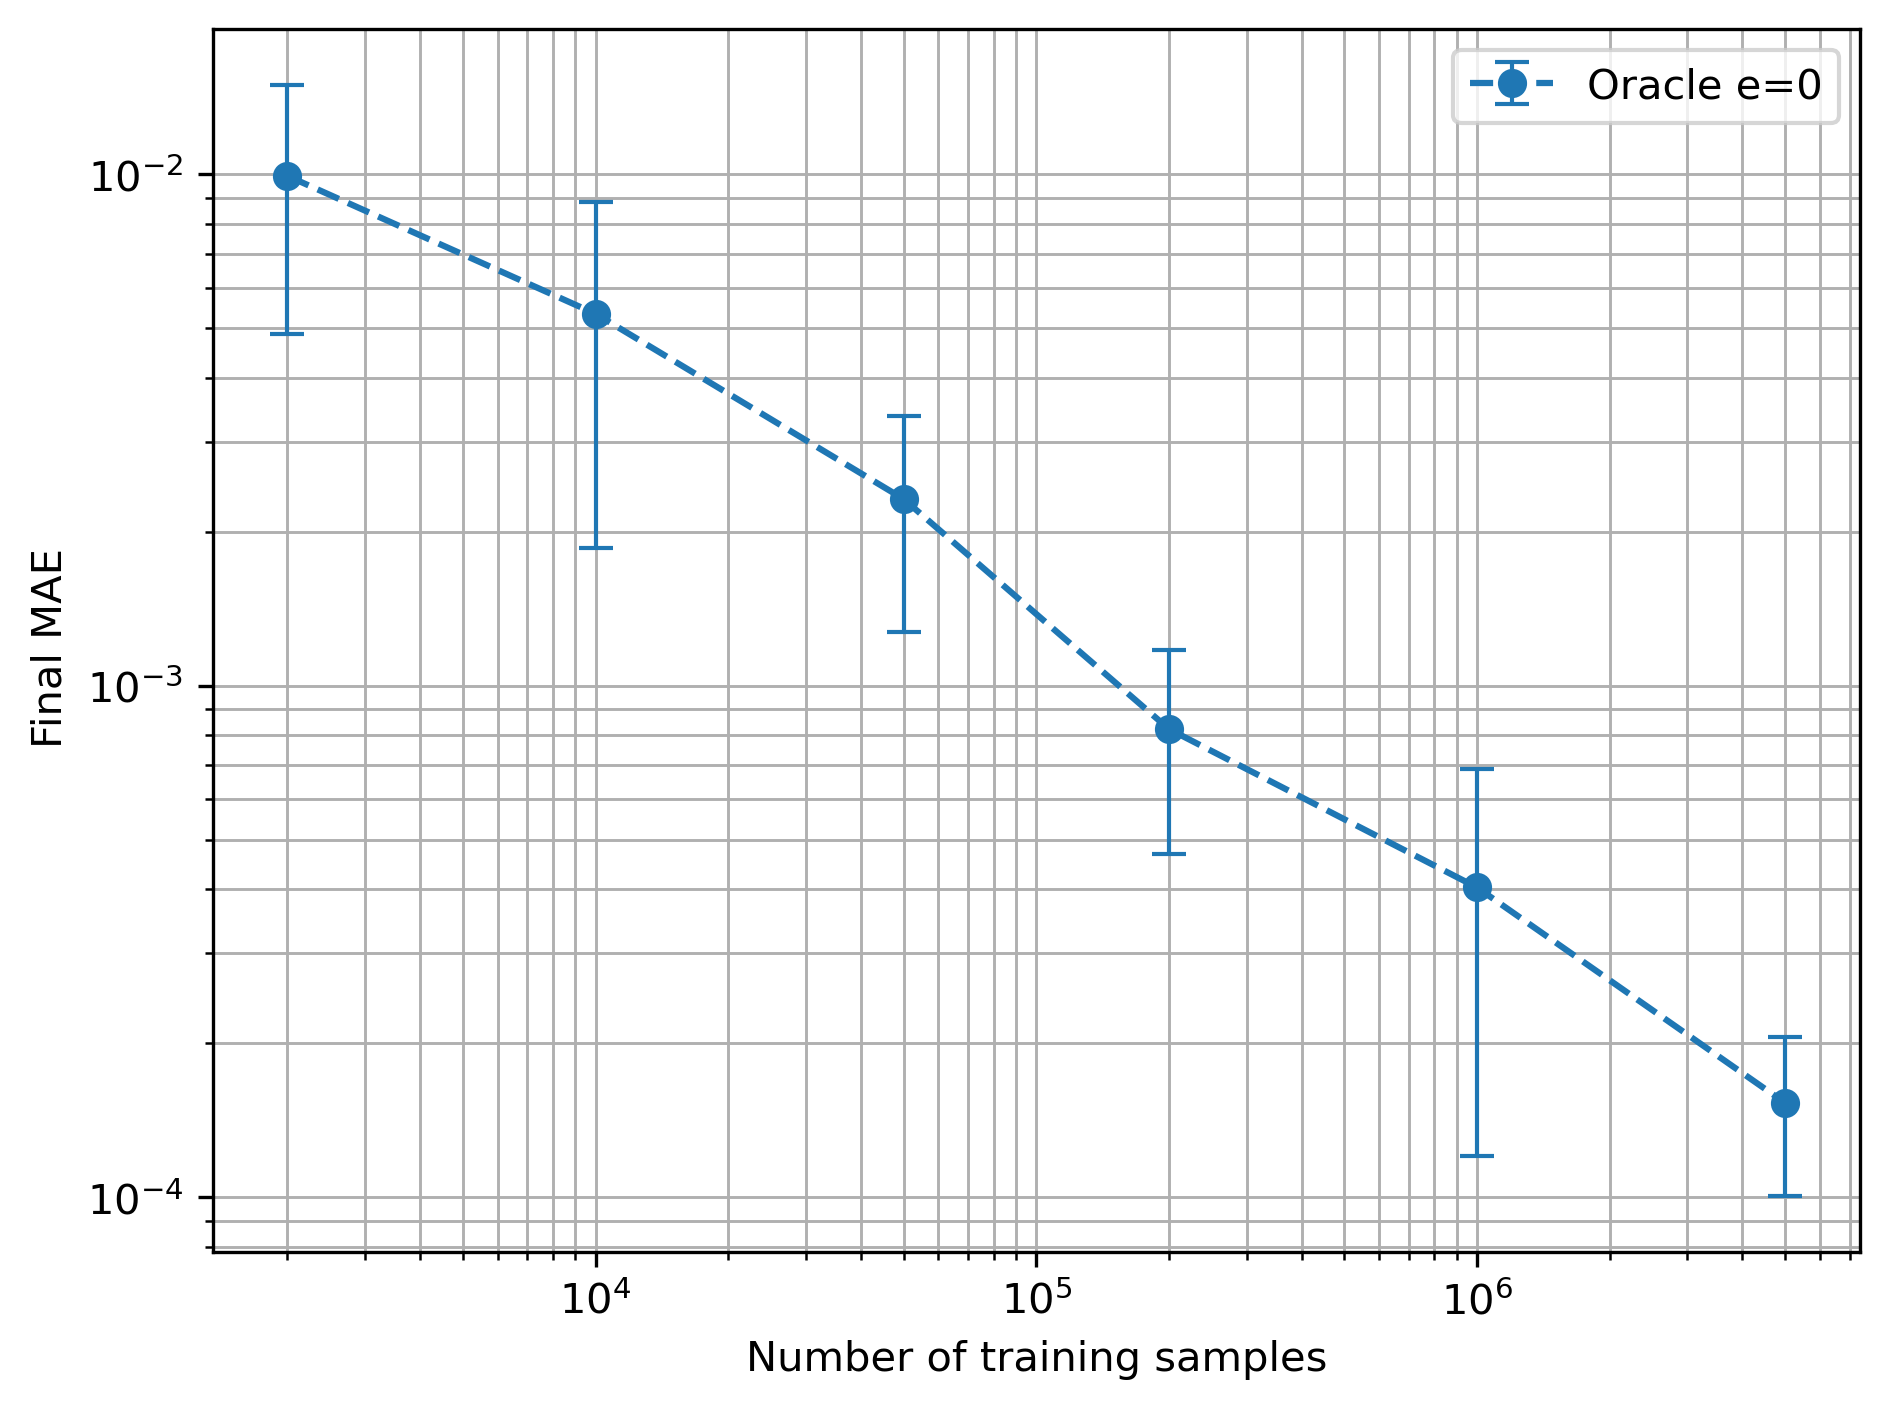

In [48]:
exclude = {1, 3, 5, 7, 9}
Nsamples_f = [n for i, n in enumerate(Nsamples) if i not in exclude]
Errs_f = [e for i, e in enumerate(Errs) if i not in exclude]

# Compute final epoch stats
y_vals = [e.mean(axis=0)[-1] for e in Errs_f]
y_errs = [e.std(axis=0)[-1] for e in Errs_f]

# Plot
plt.figure(dpi=300)
plt.errorbar(
    Nsamples_f,
    y_vals,
    yerr=y_errs,
    fmt='o-',
    linestyle='dashed',
    elinewidth=1,
    capsize=4,
    label="Oracle e=0"
)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Number of training samples")
plt.ylabel("Final MAE ")
plt.grid(True, which='both', linewidth=0.7)
plt.tight_layout()
plt.legend()
plt.savefig(path_results + "OracleSubsets2.png")
plt.show()


## Sparsity


In [62]:
data = np.load(path_results + 'Nspar.npz')
Nspar = data['Nspar']
Errs = data['Errs']

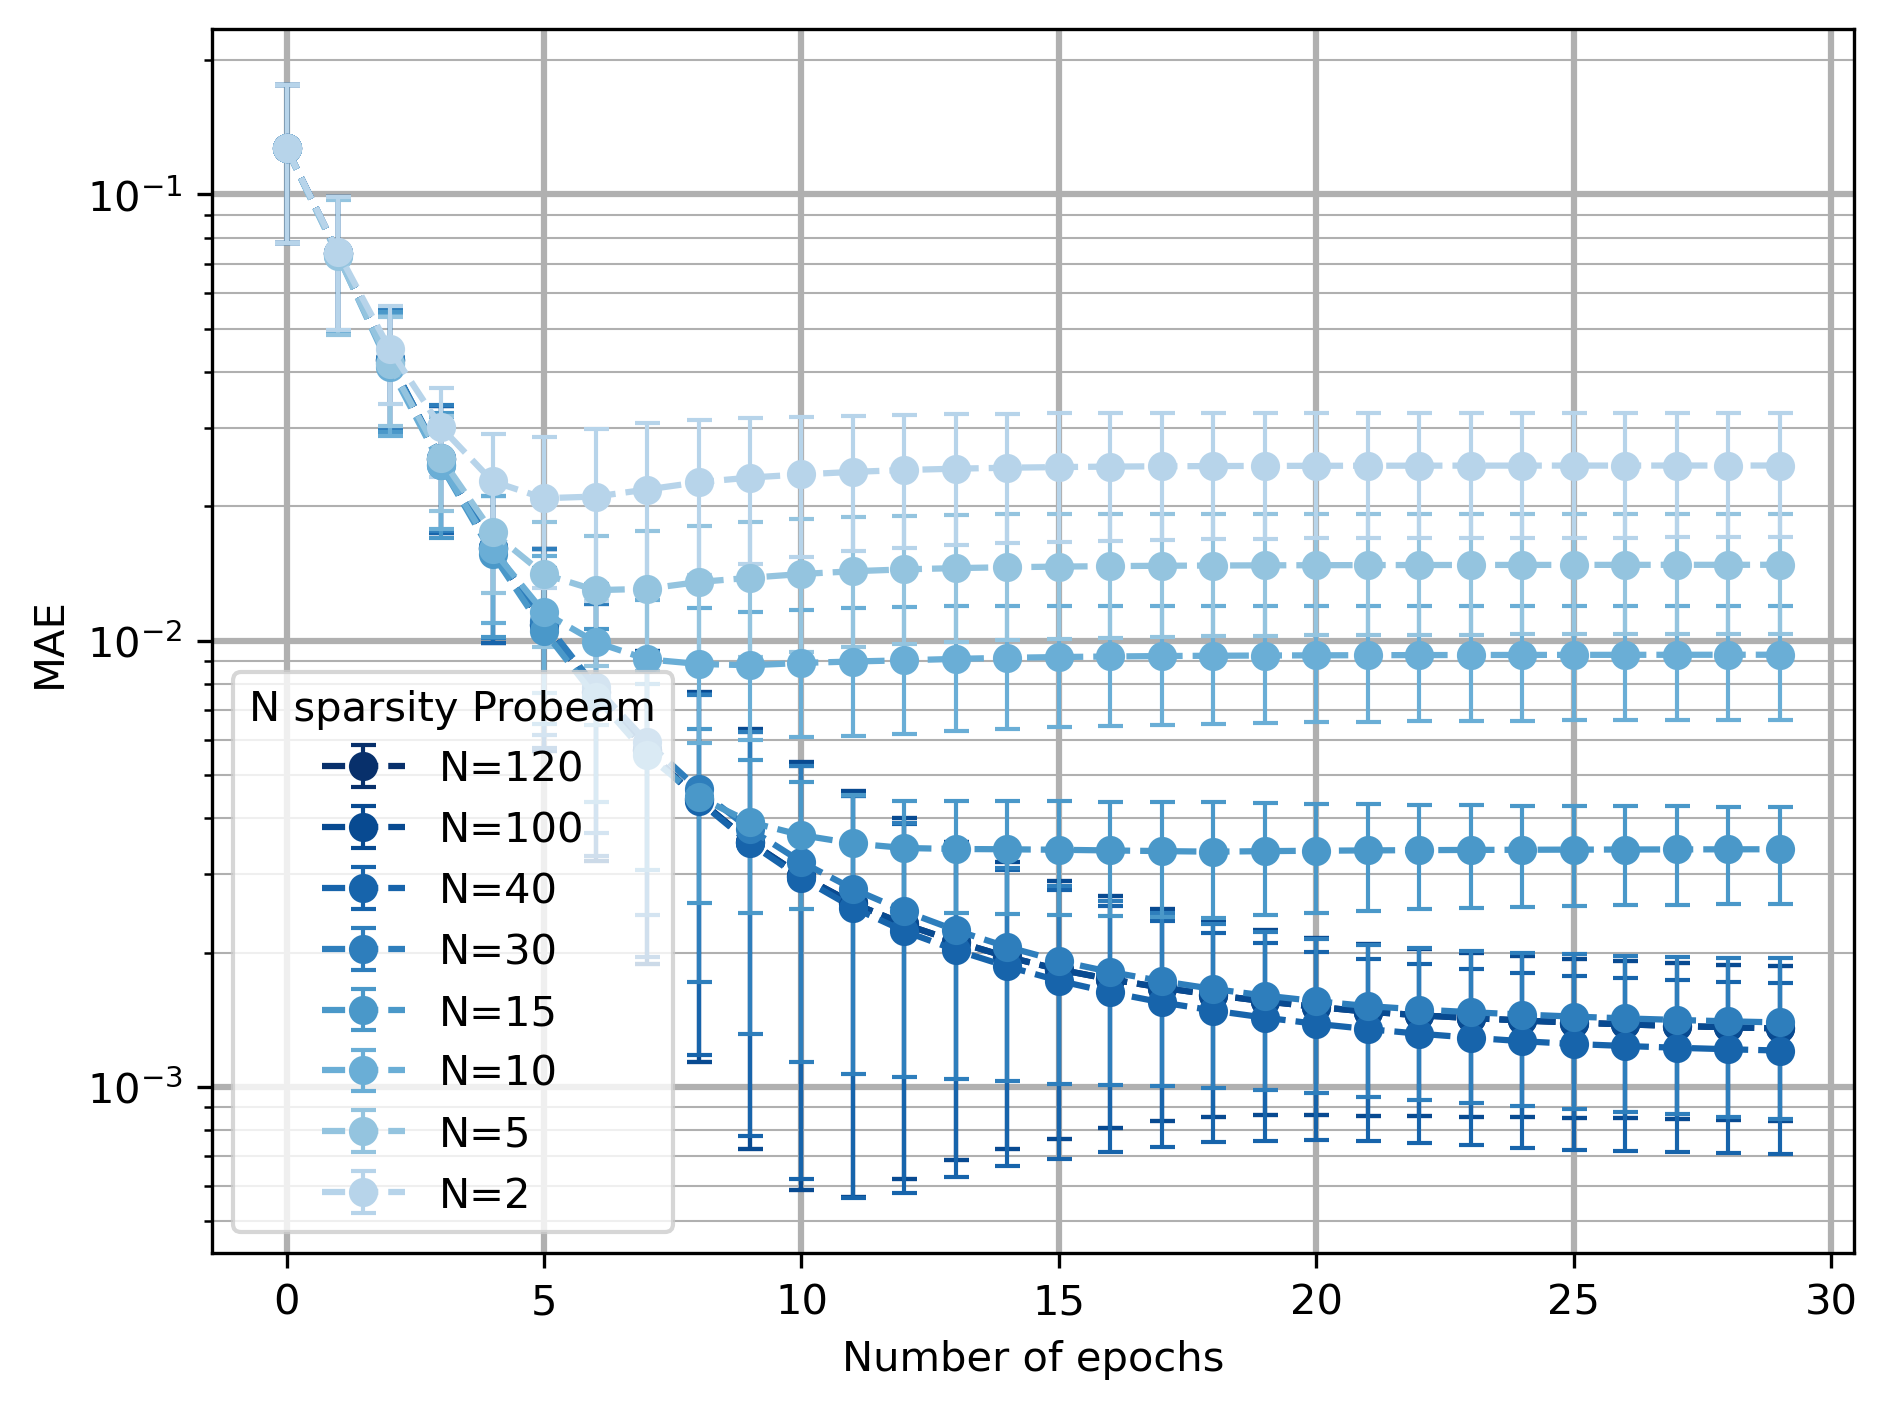

In [86]:

# (Optional) Exclude indices if needed
exclude = {4,5,7,9}
Nspar_f = [n for i, n in enumerate(Nspar) if i not in exclude]
Errs_f = [e for i, e in enumerate(Errs) if i not in exclude]
# Otherwise just:
#Nspar_f = Nspar
#Errs_f = Errs

M = len(Nspar_f)
epochs = np.arange(Errs_f[0].shape[1])

cmap = plt.get_cmap("Blues")
colors = cmap(np.linspace(0.3, 1.0, M))  # darker to lighter

plt.figure(dpi=300)
for i in reversed(range(M)):
    mean_vals = Errs_f[i].mean(axis=0)
    std_vals = Errs_f[i].std(axis=0)
    plt.errorbar(
        epochs,
        mean_vals,
        yerr=std_vals,
        label=f"N={Nspar_f[i]}",
        fmt='o',
        linestyle='dashed',
        elinewidth=1,
        capthick=1,
        capsize=3,
        color=colors[i]
    )

plt.yscale('log')
plt.xlabel("Number of epochs")
plt.ylabel("MAE")
plt.legend(title="N sparsity Probeam")
plt.grid(visible=True, which='major', linewidth=1.5)
plt.grid(visible=True, which='minor', linewidth=0.5, linestyle='-')
plt.tight_layout()
plt.savefig(path_results + "Nsparsity1.png")
plt.show()

/tmp/ipykernel_12200/3150112070.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(


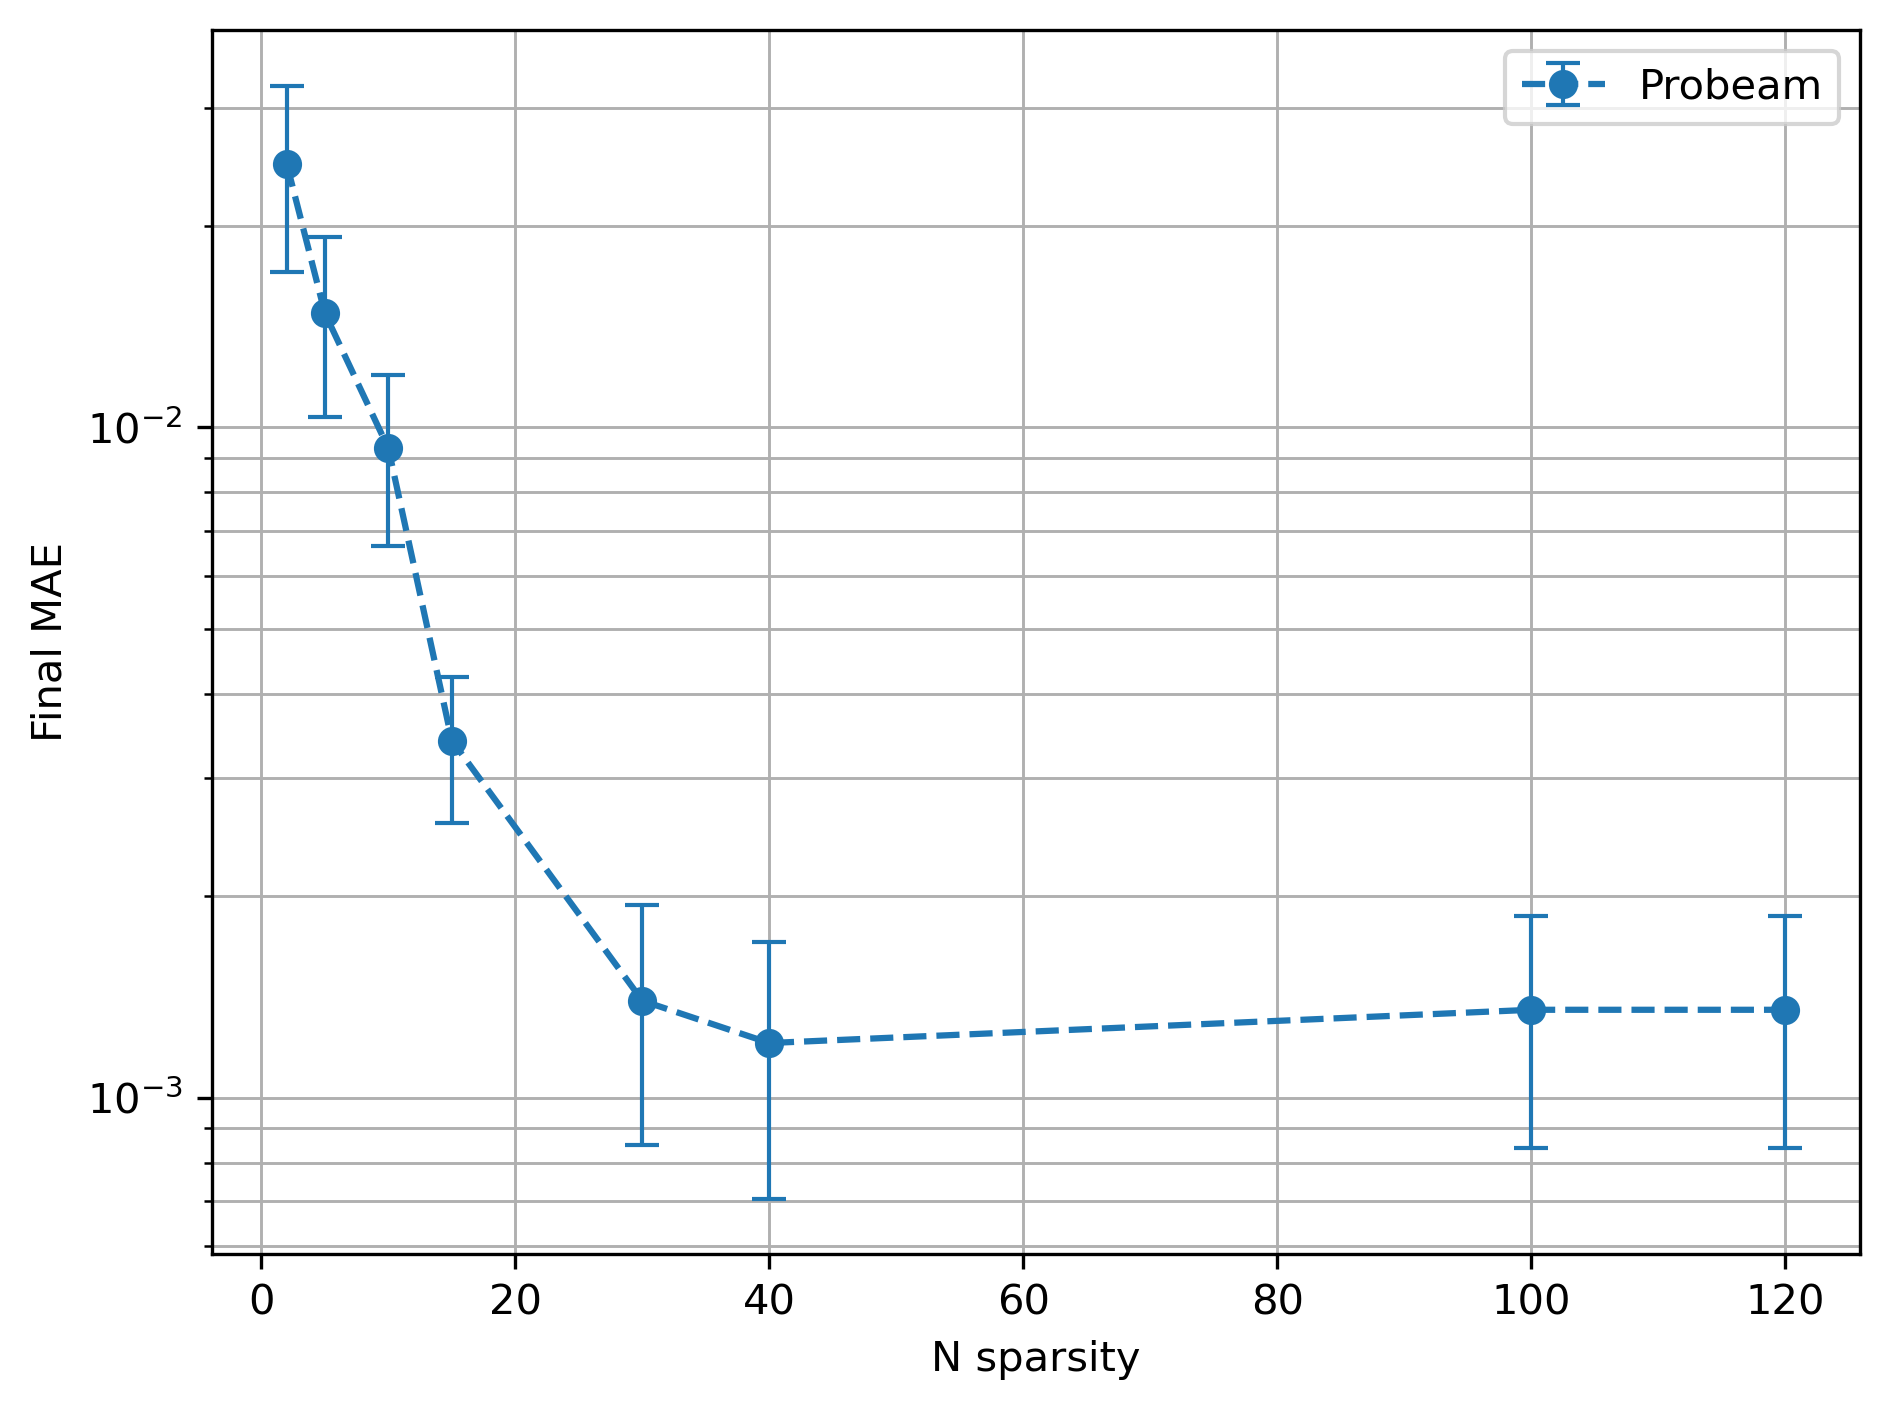

In [64]:
# Compute final values
y_vals = [e.mean(axis=0)[-1] for e in Errs_f]
y_errs = [e.std(axis=0)[-1] for e in Errs_f]

plt.figure(dpi=300)
plt.errorbar(
    Nspar_f,
    y_vals,
    yerr=y_errs,
    fmt='o-',
    linestyle='dashed',
    elinewidth=1,
    capsize=4,
    label="Probeam"
)
#plt.xscale('log')
plt.yscale('log')
plt.xlabel("N sparsity")
plt.ylabel("Final MAE")
plt.grid(True, which='both', linewidth=0.7)
plt.tight_layout()
plt.legend()
plt.savefig(path_results + "Nsparsity2.png")
plt.show()

# Comparison probeam

In [66]:
data = np.load(path_results + 'Comparison.npz')
oracle_errs    = data['oracle_errs']
oracle_t       = data['oracle_t']
probeam_errs   = data['probeam_errs']
probeam_t      = data['probeam_t']
probeamS_errs  = data['probeamS_errs']
probeamS_t     = data['probeamS_t']

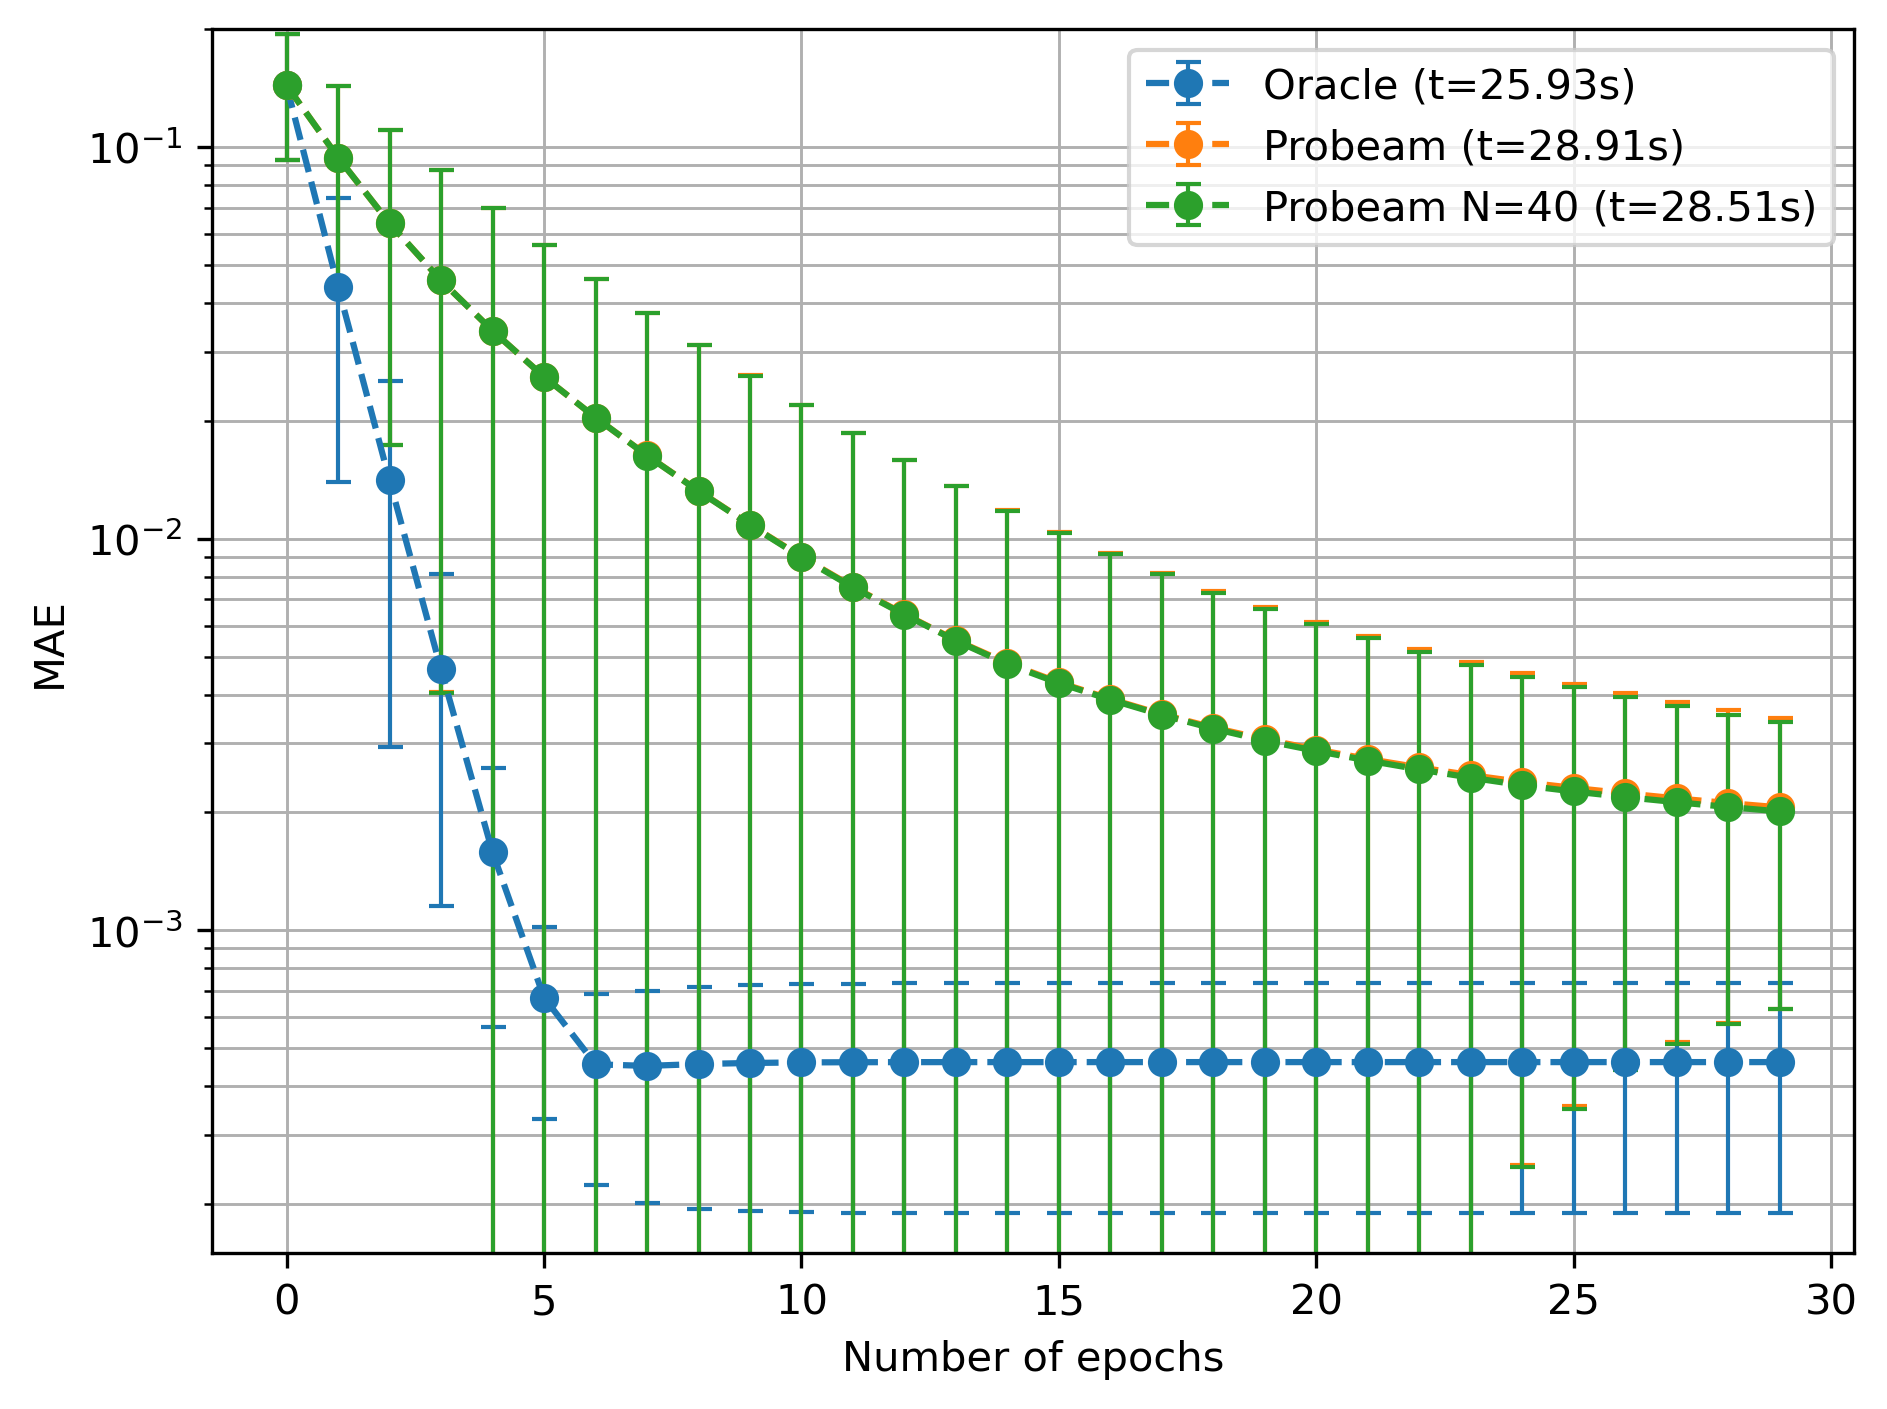

In [70]:
epochs = np.arange(oracle_errs.shape[1])
colors = ['tab:blue', 'tab:orange', 'tab:green']
# Plot
plt.figure(dpi=300)
plt.errorbar(
    epochs,
    oracle_errs.mean(axis=0),
    yerr=oracle_errs.std(axis=0),
    fmt='o',
    linestyle='dashed',
    elinewidth=1,
    capsize=3,
    color=colors[0],
    label=f"Oracle (t={oracle_t:.2f}s)"
)
plt.errorbar(
    epochs,
    probeam_errs.mean(axis=0),
    yerr=probeam_errs.std(axis=0),
    fmt='o',
    linestyle='dashed',
    elinewidth=1,
    capsize=3,
    color=colors[1],
    label=f"Probeam (t={probeam_t:.2f}s)"
)
plt.errorbar(
    epochs,
    probeamS_errs.mean(axis=0),
    yerr=probeamS_errs.std(axis=0),
    fmt='o',
    linestyle='dashed',
    elinewidth=1,
    capsize=3,
    color=colors[2],
    label=f"Probeam N=40 (t={probeamS_t:.2f}s)"
)

plt.yscale('log')
plt.xlabel("Number of epochs")
plt.ylabel("MAE")
plt.grid(True, which='both', linewidth=0.7)
plt.ylim([0.00015,0.2])
plt.legend()
plt.tight_layout()
plt.savefig(path_results + "Comparison_MAE_vs_Epochs.png")
plt.show()

In [ ]:
df=pd.read_csv(path_dataset+"protein_descriptions_5prot.csv")
names_prots=df["GeneName"].values
plt.figure()
plt.scatter(np.arange(5),true_PYs[0,:],marker='x',label="True")
plt.scatter(np.arange(5),oracle_PYs_est[0,:],marker='+',label="Oracle")
plt.scatter(np.arange(5),probeam_PYs_est[0,:],marker="2",label="Probeam")
plt.legend()
plt.show()

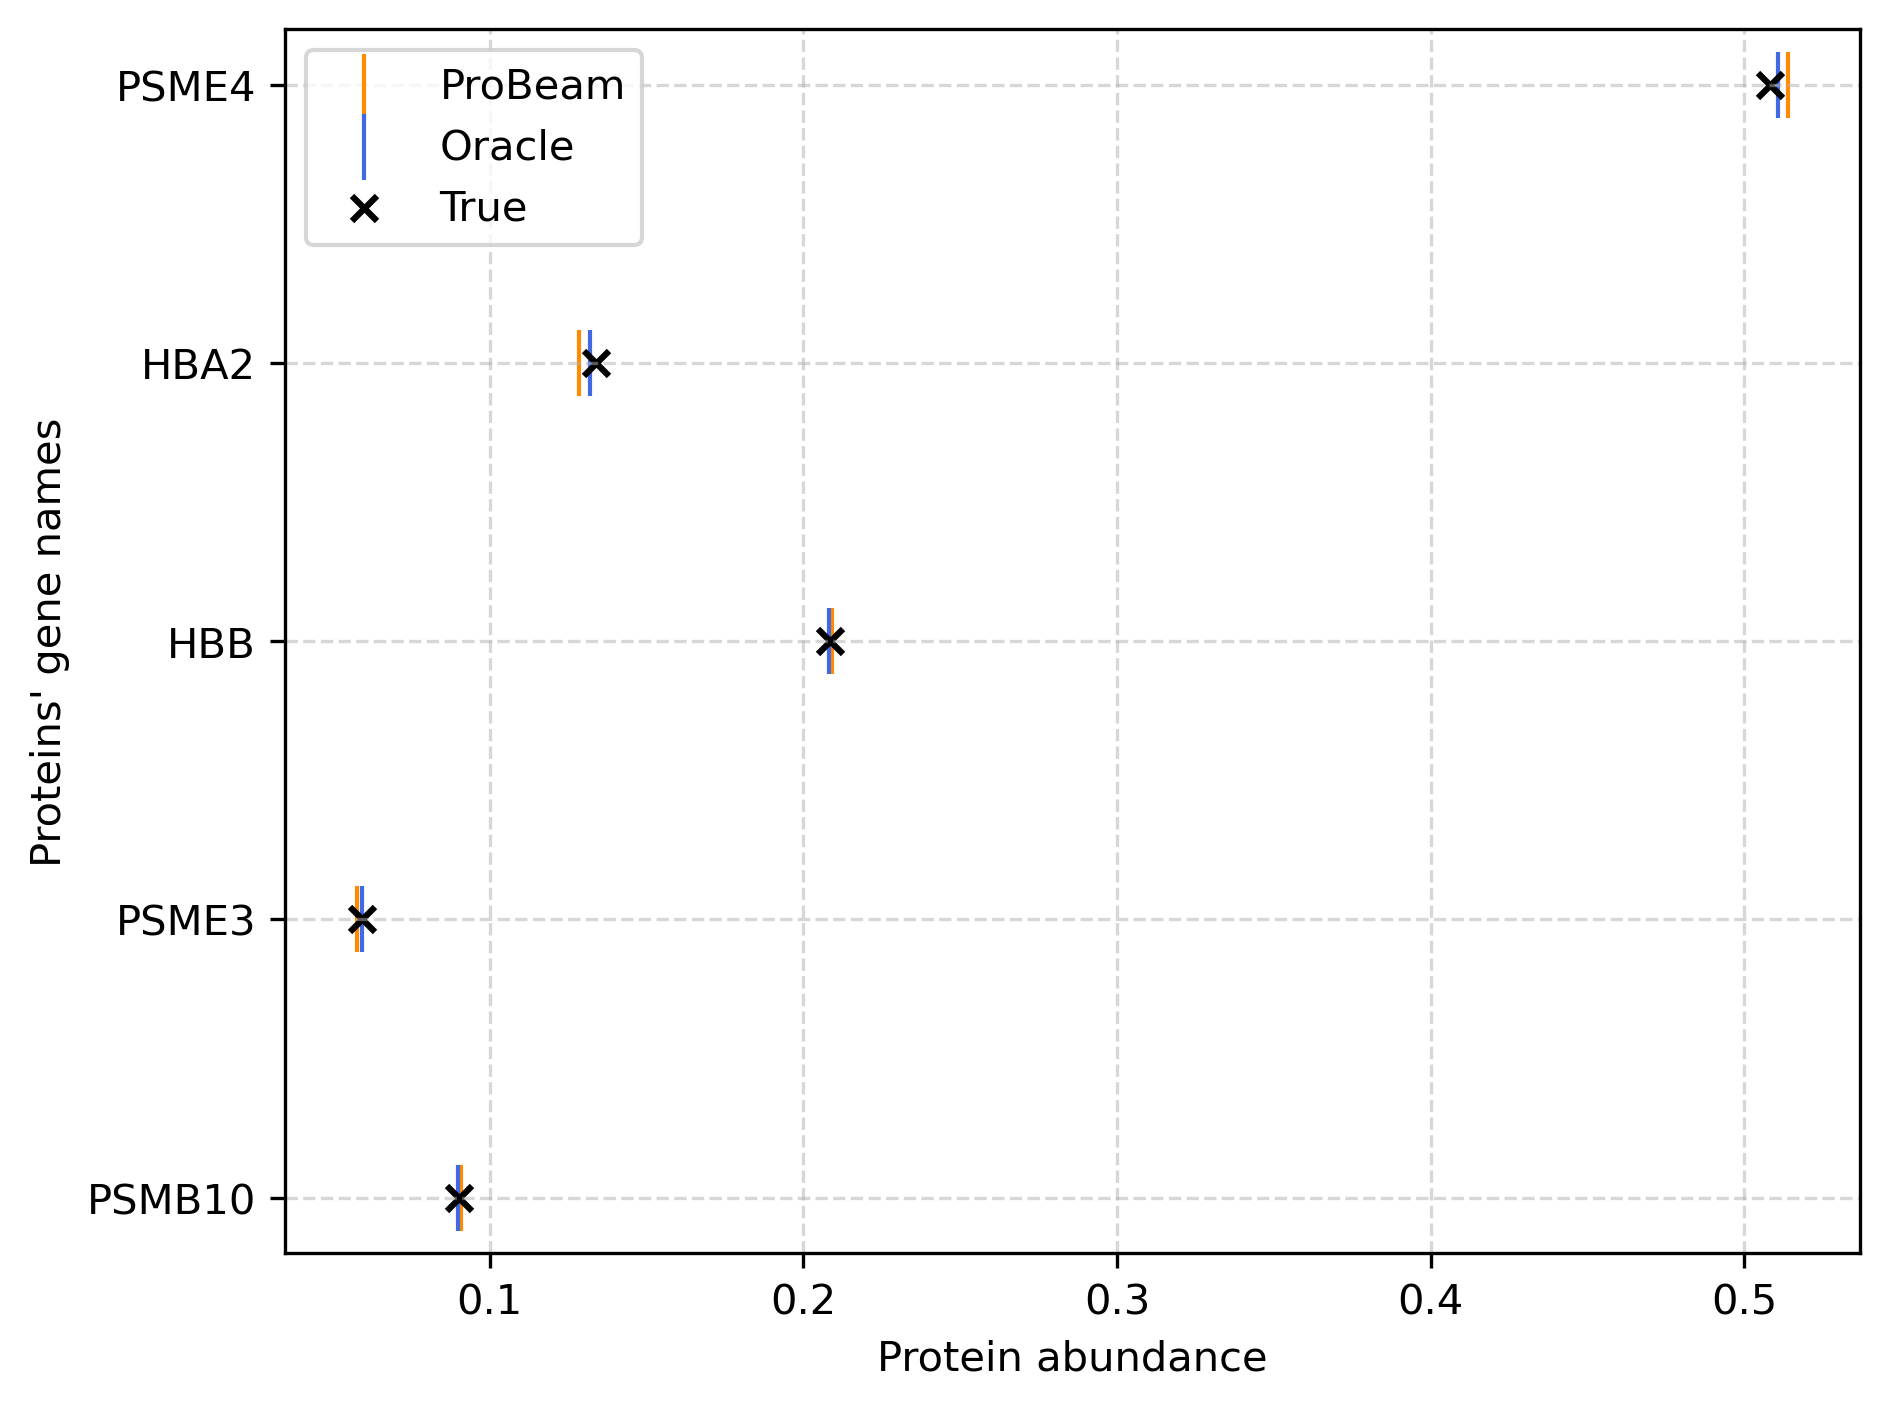

In [85]:
data = np.load(path_results + 'Comparison.npz')
true_PYs         = data['true_PYs']
oracle_PYs_est   = data['oracle_PYs_est']
probeam_PYs_est  = data['probeam_PYs_est']

# Load protein names
df = pd.read_csv(path_dataset + "protein_descriptions_5prot.csv")
names_prots = df["GeneName"].values

# Choose one sample to visualize
i = 0
x = np.arange(len(names_prots))

# Plot
plt.figure(dpi=300)
# ProBeam - orange, vertical line-style marker (like '|') using marker '1'
plt.scatter(probeam_PYs_est[i,:], x, marker='|', label="ProBeam", color='darkorange',linewidths=1, s=250)

# Oracle - blue, another line-style marker using '2'
plt.scatter(oracle_PYs_est[i,:], x, marker='|', label="Oracle", color='royalblue',linewidths=1, s=250)

plt.scatter(true_PYs[i,:], x, marker='x', label="True", color='black')


# Aesthetics
plt.yticks(x, names_prots)
plt.xlabel("Protein abundance")
plt.ylabel("Proteins' gene names")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(path_results + "Comparison_PYs_scatter.png")
plt.show()